In [9]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from util import summary_report

In [10]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df.dropna(subset=["reviewText"], inplace=True)
df.head()

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess
0,2,3,True,2010-06-15,D. Poston,bought two 85 fl oz hand cream neither dispens...,dispensers don't work,31,0.090909
1,5,14,True,2010-01-07,chandra,believe me year try many many different hand c...,Best hand cream ever.,33,0.400000
2,5,0,True,2018-04-18,Maureen G,great hand lotion,Five Stars,0,0.000000
3,5,0,True,2018-04-18,Terry K,best severely dry skin hand,Five Stars,0,0.000000
4,5,0,True,2018-04-17,Patricia Wood,best non oily hand cream ever heals overnight,I always have a backup ready.,0,0.000000


In [11]:
# could use LogisticRegression classifier to map our numbers in the range [0,1]
# Compare how it performes with TF-IDF

split = 0.01

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.helpful, test_size=0.25, random_state=30)
f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'x_train: (107302,), y_train: (107302,), x_test: (35768,), y_test: (35768,)'

<Figure size 720x576 with 0 Axes>

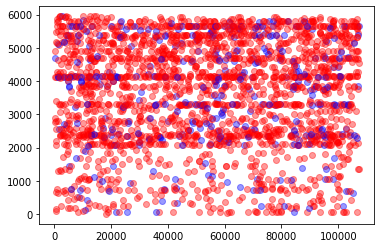

In [12]:
tm_vectorizer = CountVectorizer(stop_words="english")

term_matrix_train = tm_vectorizer.fit_transform(x_train)
term_matrix_test = tm_vectorizer.transform(x_test)

plt.figure(figsize=(10, 8))# Plotting our two-features-space
mtrx_dict = term_matrix_train.todok()
xy = list(mtrx_dict.keys())

colors=["#FF0000", "#0000FF"]

fig = plt.figure()
ax = fig.add_subplot()

LIMIT = 2500
data = random.sample(list(zip(xy, y_train)), LIMIT)
for i in range(len(data)):
    ax.scatter(x=data[i][0][0], y=data[i][0][1], color=colors[data[i][1]], alpha=0.4)
plt.show()

# Support-Vector Machine

In [13]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, max_iter=5000, verbose=True)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

[LibLinear]....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
optimization finished, #iter = 5000

Using -s 2 may be faster (also see FAQ)

Objective value = -24889.223175
nSV = 80469


/Users/apb/Library/Caches/pypoetry/virtualenvs/amazon-sentiment-53yd7LNS-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Document-term Matrix(Count Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.89      0.95      0.92     30876
     Helpful       0.47      0.26      0.34      4892

    accuracy                           0.86     35768
   macro avg       0.68      0.61      0.63     35768
weighted avg       0.83      0.86      0.84     35768

Balanced acc score:  0.21384170395611934


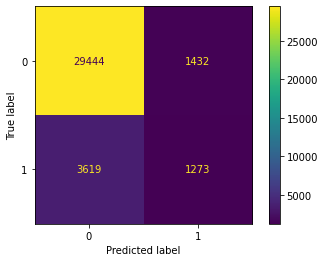

In [14]:
summary_report(y_test, y_test_pred, "Document-term Matrix(Count Vectorizer) - SVM/SVC")

# Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier

# Using lbfgs over adam as it is much faster on smaller datasets(1min vs 6min(42k samples on M1 macbook air))
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=500, random_state=1)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

Document-term Matrix(Count Vectorizer) - Multi-layer Perceptron (MLP)
              precision    recall  f1-score   support

   Unhelpful       0.89      0.91      0.90     30876
     Helpful       0.37      0.32      0.34      4892

    accuracy                           0.83     35768
   macro avg       0.63      0.62      0.62     35768
weighted avg       0.82      0.83      0.83     35768

Balanced acc score:  0.23545698103785906


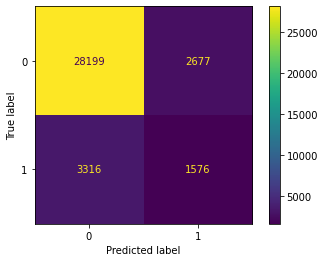

In [16]:
summary_report(y_test, y_test_pred, "Document-term Matrix(Count Vectorizer) - Multi-layer Perceptron (MLP)")